In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

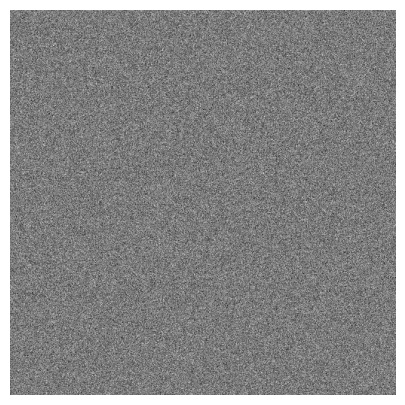

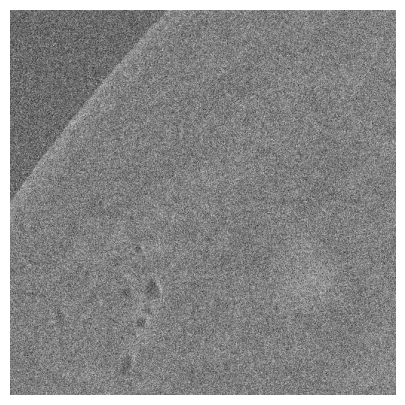

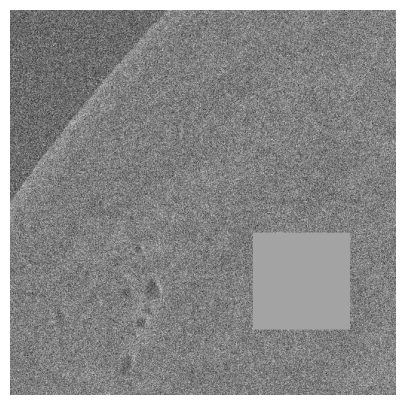

In [18]:
# define image and mask
image_path = repo_path / 'data/CDD-CESM/masses_closeup/images/CEM-square_small_bbox/P2_R_CM_CC_reg3.jpg'
mask_path = repo_path / 'data/CDD-CESM/masses_closeup/masks/CEM-square_small_bbox/P2_R_CM_CC_reg3.png'
im_array = cv.imread(str(image_path)).astype(np.float32)[:,:,0]
mask_array = cv.imread(str(mask_path), cv.IMREAD_GRAYSCALE)
# define noise gausssian noise
noise = np.random.normal(0, 1, im_array.shape)
plt.figure(figsize=(10,5))
plt.imshow(noise, cmap='gray')
plt.axis('off')

# normalize the image from -1 t 1
im_norm = (im_array - 127.5) / 127.5
# sum a fraction of the noise to the image
fraction = .5
noisy_im_array = im_norm + fraction * noise
noisy_masked_array = noisy_im_array * (mask_array==0)
plt.figure(figsize=(10,5))
plt.imshow(noisy_im_array, cmap='gray')
plt.axis('off')

plt.figure(figsize=(10,5))
plt.imshow(noisy_masked_array, cmap='gray')
# remove axis
plt.axis('off')
plt.show()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])